# Homography and stereo

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

[[318. 263.]
 [524. 376.]
 [310. 660.]
 [ 87. 479.]]


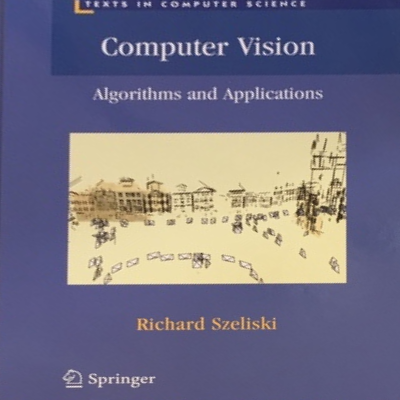

In [0]:
# Taks 1
pts1 = np.load('Points.npy')
pts2 = np.array([[0,0], [400,0], [400,400], [0,400]])
h, status = cv2.findHomography(pts1, pts2)

im_src = cv2.imread('book1.jpg')
im_dst = cv2.warpPerspective(im_src, h, (400,400))
cv2_imshow(im_dst)

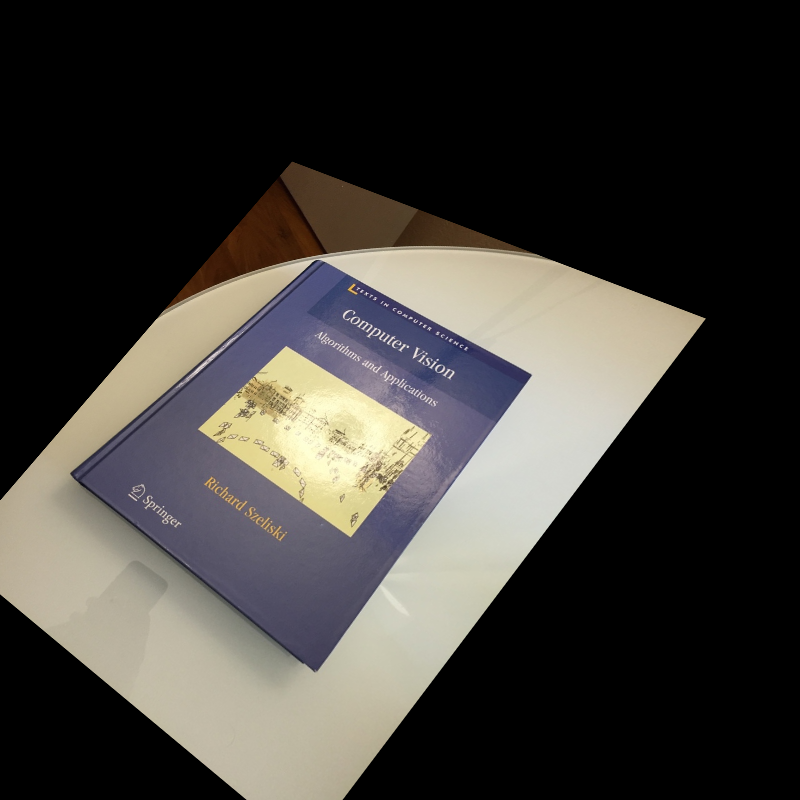

In [0]:
# Task 2
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)
h, status = cv2.findHomography(pts_src, pts_dst)

im_src = cv2.imread('book2.jpg')
im_dst = cv2.warpPerspective(im_src, h, (800,800))
cv2_imshow(im_dst)

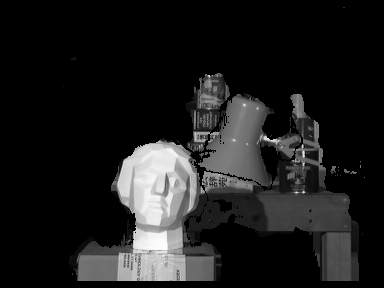

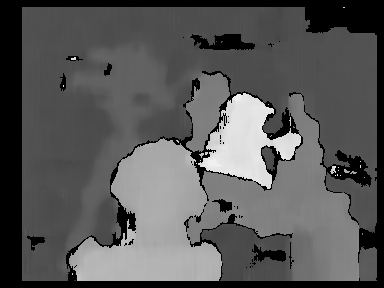

In [10]:
# Task 3
il = cv2.imread('tsukuba_l.png', 0)
ir = cv2.imread('tsukuba_r.png', 0)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(il, ir)

threshold = 120
for i in range(il.shape[0]):
  for j in range(il.shape[1]):
    if disparity[i,j] < threshold:
      il[i,j] = 0

cv2_imshow(il)
cv2_imshow(disparity)

.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


.............................................................................................................................................................................................................................................................................................................................................................

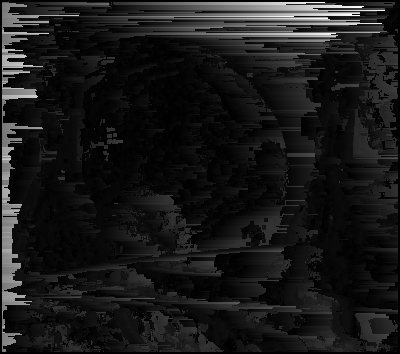

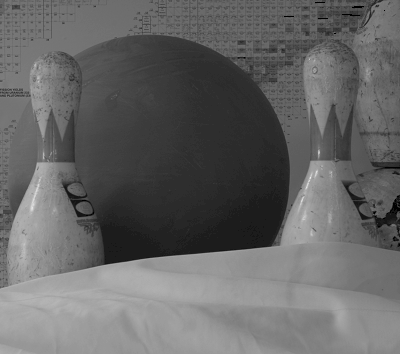

In [32]:
# Task 4, slow but correct, adjust value of threshold
il = cv2.imread('view0.png', 0)
ir = cv2.imread('view1.png', 0)

disparity = np.zeros_like(il, dtype='uint8')

# loop through matrix, consider 5x5 block
for i in range(2, disparity.shape[0]-2):
  print('.', end='')
  for j in range(2,disparity.shape[1]-2):
    # loop through col corresponding to row
    minima = 255 # biggest uint8
    start = max(j-50, 2)
    for k in range(start,j):
      value = 0
      # calculate for 3x3 matrix
      for p in range(-2,2):
        for q in range(-2,2):
          value += (il[i+p,j+q] - ir[i+p,k+q])^2
      if value < minima:
        minima = value
        pos = [i,k]
    disparity[i,j] = (j - pos[1])

cv2_imshow(disparity)

for i in range(il.shape[0]):
  for j in range(il.shape[1]):
    if disparity[i,j] > 100:
      il[i,j] = 0
cv2_imshow(il)